# Analyse der Country-Daten von SteamSpy.com

In [1]:
# Import
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Path to the data
path = '/home/jm/Desktop/Data/SteamSpy_Data/Country_Data/'

# Load each file and concatenate the DataFrames
data = [pd.read_csv(file) for file in [path+file for file in os.listdir(path)]]
df = pd.concat(data)

data = []

# Iterate over each file in the folder
for file in [path+file for file in os.listdir(path)]:
    # Read the csv
    df = pd.read_csv(file)
    # Add the Date-Column to the DataFrame
    df['Date'] = file.rsplit('/', 1)[-1].split('_')[0]
    # Save the DataFrame
    data.append(df)
df = pd.concat(data)
# Parse the Date-Column and set an index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [3]:
df.shape

(16398, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16398 entries, 2018-02-04 to 2018-02-26
Data columns (total 10 columns):
Country                     16398 non-null object
Active_Users                16398 non-null int64
Active_Users_Variance       16398 non-null int64
Share_Total_Users           16398 non-null float64
Share_Total_Games           16398 non-null float64
Games_Per_User              16398 non-null float64
Average_Playtime_2_Weeks    16398 non-null int64
Average_Playtime_Total      16398 non-null int64
Active_Users_2_Weeks        16398 non-null float64
Active_Users_Total          16398 non-null float64
dtypes: float64(5), int64(4), object(1)
memory usage: 1.4+ MB


In [5]:
df.head()

,Country,Active_Users,Active_Users_Variance,Share_Total_Users,Share_Total_Games,Games_Per_User,Average_Playtime_2_Weeks,Average_Playtime_Total,Active_Users_2_Weeks,Active_Users_Total
Date,,,,,,,,,,
2018-02-04,United States,38171349,302581,13.25,21.99,42.42,1577,59958,33.0,88.0
2018-02-04,China,31840583,341713,11.05,5.13,12.09,1866,29772,56.0,91.0
2018-02-04,Russia,24954592,354898,8.66,7.47,22.36,1719,53398,26.0,86.0
2018-02-04,Brazil,17243610,337165,5.98,5.04,22.14,1501,39062,31.0,85.0
2018-02-04,Germany,11134677,295022,3.86,5.42,35.65,1451,57667,35.0,91.0


In [6]:
work_df = df.groupby('Country').agg('mean')
work_df.head()

,Active_Users,Active_Users_Variance,Share_Total_Users,Share_Total_Games,Games_Per_User,Average_Playtime_2_Weeks,Average_Playtime_Total,Active_Users_2_Weeks,Active_Users_Total
Country,,,,,,,,,
Afghanistan,1.157789e+06,105236.396341,0.410305,0.191341,11.923902,1480.286585,33767.823171,19.152439,77.207317
Aland Islands,2.299971e+05,47318.817073,0.081402,0.026829,8.441829,1633.042683,24730.164634,16.304878,62.768293
Albania,5.673050e+05,74088.378049,0.201220,0.070732,9.040488,1611.030488,30221.128049,17.170732,69.689024
Algeria,6.263787e+05,77732.286585,0.222317,0.092805,10.734939,1657.189024,26092.262195,12.140244,58.335366
American Samoa,3.238829e+05,56090.646341,0.114695,0.045671,10.121585,1667.304878,30879.079268,21.658537,71.109756


In [7]:
for column in work_df.columns:
    print(work_df[column].sort_values(ascending=False).head())
    print()

Country
United States    3.850539e+07
China            3.193601e+07
Russia           2.541462e+07
Brazil           1.648514e+07
Germany          1.168526e+07
Name: Active_Users, dtype: float64

Country
Russia           348560.420732
China            331074.963415
Brazil           328305.426829
Germany          295443.597561
United States    290305.579268
Name: Active_Users_Variance, dtype: float64

Country
United States    13.659878
China            11.338110
Russia            9.015305
Brazil            5.846220
Germany           4.147317
Name: Share_Total_Users, dtype: float64

Country
United States     22.342256
Russia             7.698354
Germany            5.844207
United Kingdom     5.550122
Canada             5.368780
Name: Share_Total_Games, dtype: float64

Country
Holy See (Vatican City State)    54.457945
United Kingdom                   49.874024
Uganda                           46.280750
Finland                          44.703354
Australia                        43.399268
Na

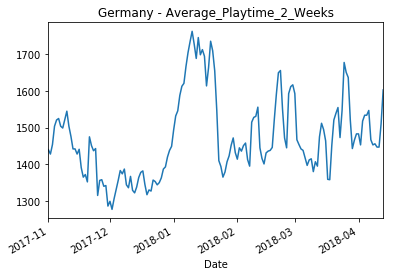

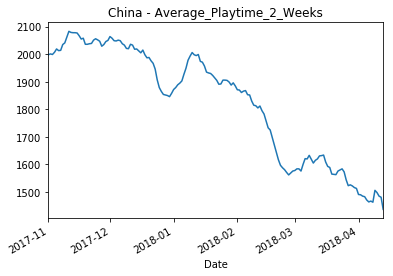

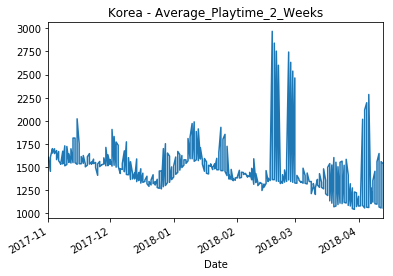

In [8]:
for country in ['Germany', 'China', 'Korea']:
    df[df['Country']==country]['Average_Playtime_2_Weeks'].plot()
    plt.title('{} - Average_Playtime_2_Weeks'.format(country))
    plt.show()

In [10]:
# Path to the data
path = '/home/jm/Desktop/Data/SteamSpy_Data/Country_Ranks/'

# Load each file and concatenate the DataFrames
data = [pd.read_csv(file) for file in [path+file for file in os.listdir(path)]]
df = pd.concat(data)

data = []

# Iterate over each file in the folder
for file in [path+file for file in os.listdir(path)]:
    # Read the csv
    df = pd.read_csv(file)
    # Add the Date-Column to the DataFrame
    df['Date'] = file.rsplit('/', 1)[-1].split('_')[0]
    # Save the DataFrame
    data.append(df)
df = pd.concat(data)
# Parse the Date-Column and set an index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [11]:
df.head(10)

,Country,Country_Link,Games_Per_User,Minutes (2 Weeks),Rank,Name,Category
Date,,,,,,,
2018-01-19,United States,US,42.78,1786,1,Team Fortress 2,Most Owned Games
2018-01-19,United States,US,42.78,1786,2,Counter-Strike: Global Offensive,Most Owned Games
2018-01-19,United States,US,42.78,1786,3,Garry's Mod,Most Owned Games
2018-01-19,United States,US,42.78,1786,4,Unturned,Most Owned Games
2018-01-19,United States,US,42.78,1786,5,Dota 2,Most Owned Games
2018-01-19,United States,US,42.78,1786,1,PLAYERUNKNOWN'S BATTLEGROUNDS,Favorite Games (2 Weeks)
2018-01-19,United States,US,42.78,1786,2,Counter-Strike: Global Offensive,Favorite Games (2 Weeks)
2018-01-19,United States,US,42.78,1786,3,VRChat,Favorite Games (2 Weeks)
2018-01-19,United States,US,42.78,1786,4,Tom Clancy's Rainbow Six Siege,Favorite Games (2 Weeks)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 164000 entries, 2018-01-19 to 2018-02-15
Data columns (total 7 columns):
Country              164000 non-null object
Country_Link         164000 non-null object
Games_Per_User       164000 non-null float64
Minutes (2 Weeks)    164000 non-null int64
Rank                 164000 non-null int64
Name                 161235 non-null object
Category             164000 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 10.0+ MB


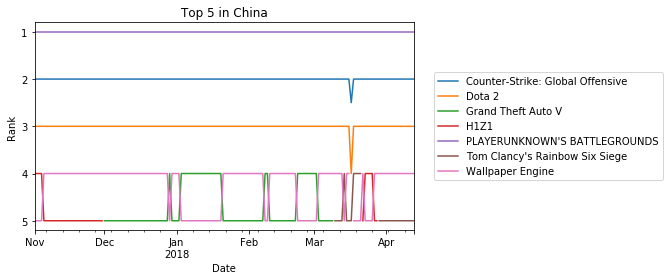

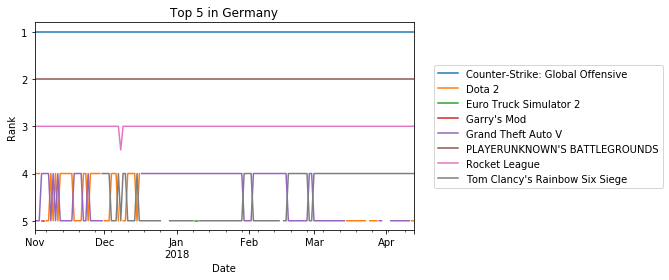

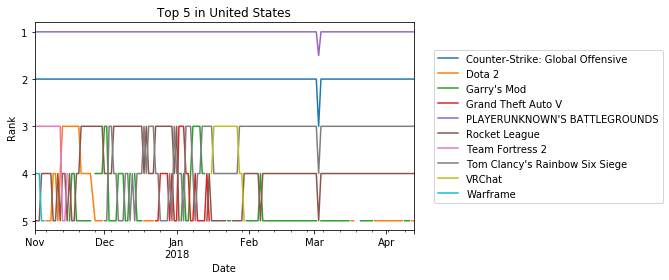

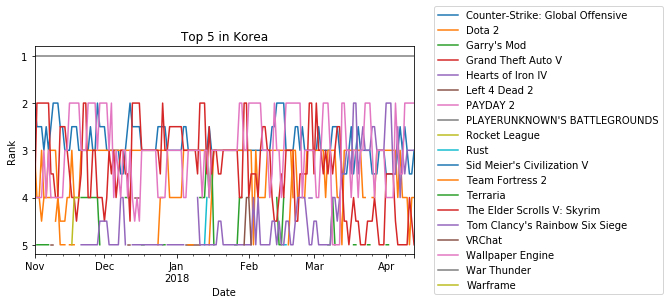

In [13]:
# Country to plot
countries = ['China', 'Germany', 'United States', 'Korea']

for country in countries:
    # Slice the data
    work_df = df[(df['Country']==country) & (df['Category']=='Favorite Games (2 Weeks)')][['Rank', 'Name']]

    # Pivot the data to get lines for each game and plot it
    work_df.reset_index().pivot_table(index='Date', columns='Name', values='Rank').plot()
    plt.title('Top 5 in {}'.format(country))
    plt.ylabel('Rank')
    plt.yticks(np.flip(np.arange(1, 6, 1), 0))
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [14]:
df.groupby('Name').agg({'Rank':'mean'}).sort_values(by='Rank').head(10)

,Rank
Name,
Counter-Strike: Global Offensive,1.631237
SteamVR,2.000000
Dota 2,2.316118
PLAYERUNKNOWN'S BATTLEGROUNDS,2.342698
The Elder Scrolls Online: Tamriel Unlimited,2.800000
Team Fortress 2,2.847820
Slay the Spire,2.857143
Sid Meiers Civilization VI,2.866667
Total War: WARHAMMER II,2.937500


In [15]:
df.head()

,Country,Country_Link,Games_Per_User,Minutes (2 Weeks),Rank,Name,Category
Date,,,,,,,
2018-01-19,United States,US,42.78,1786,1,Team Fortress 2,Most Owned Games
2018-01-19,United States,US,42.78,1786,2,Counter-Strike: Global Offensive,Most Owned Games
2018-01-19,United States,US,42.78,1786,3,Garry's Mod,Most Owned Games
2018-01-19,United States,US,42.78,1786,4,Unturned,Most Owned Games
2018-01-19,United States,US,42.78,1786,5,Dota 2,Most Owned Games


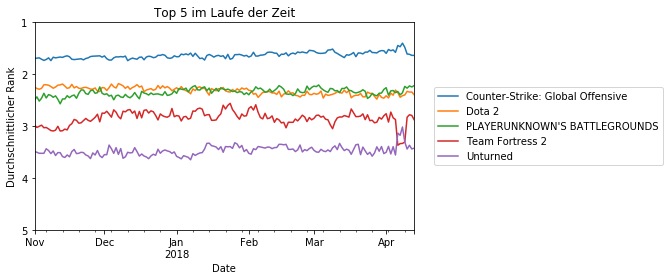

In [16]:
# Top n games
n = 5
# Game has to be in m rankings
m = 20

ranking = df.groupby([pd.TimeGrouper(freq='d'), 'Name']).agg({'Rank':'mean', 'Country':'count'}).reset_index().set_index('Date')
ranking = ranking[ranking['Country']>m].groupby(pd.TimeGrouper(freq='d'), group_keys=False).apply(lambda x: x.sort_values(by='Rank', ascending=True).head(n))[['Name', 'Rank']]


# Pivot the data to get lines for each game and plot it
ranking.reset_index().pivot_table(index='Date', columns='Name', values='Rank').plot()
plt.title('Top {} im Laufe der Zeit'.format(n))
plt.ylabel('Durchschnittlicher Rank')
plt.yticks(np.flip(np.arange(1, 6, 1), 0))
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()